In [1]:
import json
import pandas as pd
import os
import sys
import ast
import numpy as np
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
# Get the parent directory of the current directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)
from config import Config

In [2]:
config = Config()
data_path = '../' + config.data_path

In [3]:
converters={'input_ids': ast.literal_eval, 
            'token_type_ids':ast.literal_eval, 
            'ner_labels': ast.literal_eval, 
            #'classification_labels': ast.literal_eval, 
            'token_predictions': ast.literal_eval,
           # 'classification_predictions': ast.literal_eval,
           }

In [31]:
results = pd.read_csv('../results/predictions_token_classification_version_17.csv', converters=converters)

In [32]:
results

,input_ids,attention_masks,token_type_ids,ner_labels,token_predictions
0,"[3, 62, 2749, 8469, 26918, 2186, 111, 21949, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 3, 1, 0, 5, 3, 1, 0, 0, 0, 0, 0, 0, ...","[0, 5, 3, 1, 0, 5, 3, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[3, 5394, 111, 25452, 26918, 62, 26966, 99, 26...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, ...","[0, 5, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, ..."
2,"[3, 62, 62, 26966, 99, 13335, 12296, 26954, 54...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 5, 3, ...","[0, 5, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 5, 3, 0, ..."
3,"[3, 864, 86, 20022, 26908, 26964, 26918, 7785,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 0, 0, 1, 2, 0, 0, 5, 3, 4, 1, 0, 0, 1, ...","[0, 0, 0, 1, 2, 0, 0, 5, 3, 4, 1, 0, 0, 1, 0, ..."
4,"[3, 400, 11168, 165, 26966, 53, 799, 13866, 26...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 5, 3, ...","[0, 5, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 5, 3, 4, ..."
...,...,...,...,...,...
1946,"[3, 8120, 111, 18292, 77, 26954, 53, 26955, 26...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 3, 1, 2, 0, 0, 0, 0, 5, 3, 1, 2, 2, ...","[0, 5, 3, 1, 2, 0, 0, 0, 0, 5, 3, 1, 2, 2, 0, ..."
1947,"[3, 99, 2221, 15099, 11847, 26954, 19, 26955, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, ...","[0, 5, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, ..."
1948,"[3, 6035, 111, 7265, 5703, 75, 26954, 19, 2695...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 5, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1949,"[3, 864, 86, 20022, 26908, 26964, 26954, 11903...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
tokenizer = AutoTokenizer.from_pretrained(config.transformer_model)

In [33]:
for i,d in results[:10].iterrows():
    print(i)
    for i, l, p in zip(d['input_ids'],d['ner_labels'], d['token_predictions']):
        tup = (tokenizer.decode(i), l, config.idx2label[p])
        print(tup)

0
('[CLS]', -100, 'O')
('1', 5, 'B-QUANTITY')
('Liter', 3, 'B-UNIT')
('Milch', 1, 'B-INGREDIENT')
(',', 0, 'O')
('50', 5, 'B-QUANTITY')
('g', 3, 'B-UNIT')
('Butter', 1, 'B-INGREDIENT')
(',', 0, 'O')
('1', 0, 'O')
('Pri', 0, 'O')
('##se', 0, 'O')
('(', 0, 'O')
('n', 0, 'O')
(')', 0, 'O')
('Salz', 1, 'B-INGREDIENT')
(',', 0, 'O')
('4', 5, 'B-QUANTITY')
('E', 3, 'B-UNIT')
('##L', 4, 'I-UNIT')
('Zucker', 1, 'B-INGREDIENT')
(',', 0, 'O')
('1', 5, 'B-QUANTITY')
('P', 3, 'B-UNIT')
('##ck', 4, 'I-UNIT')
('.', 0, 'O')
('Van', 1, 'B-INGREDIENT')
('##ille', 2, 'I-INGREDIENT')
('##zu', 2, 'I-INGREDIENT')
('##cker', 2, 'I-INGREDIENT')
(',', 0, 'O')
('125', 5, 'B-QUANTITY')
('g', 3, 'B-UNIT')
('Grie', 1, 'B-INGREDIENT')
('##ß', 2, 'I-INGREDIENT')
(',', 0, 'O')
('1', 0, 'O')
('kg', 0, 'O')
('Ä', 1, 'B-INGREDIENT')
('##pfel', 2, 'I-INGREDIENT')
(',', 0, 'O')
('200', 5, 'B-QUANTITY')
('m', 3, 'B-UNIT')
('##l', 4, 'I-UNIT')
('Wein', 1, 'B-INGREDIENT')
(',', 0, 'O')
('weiß', 0, 'O')
(',', 0, 'O')
('1', 0

In [34]:
def flat_list(lst):
    return [item for sublist in lst for item in sublist]


In [35]:
labels = flat_list(results['ner_labels'].tolist())
predictions = flat_list(results['token_predictions'].tolist())

len(labels) == len(predictions)

True

In [37]:
true_labels = []
true_predictions = []
for l, p in zip(labels, predictions): 
    if l != -100:
        true_labels.append(l)
        true_predictions.append(p)

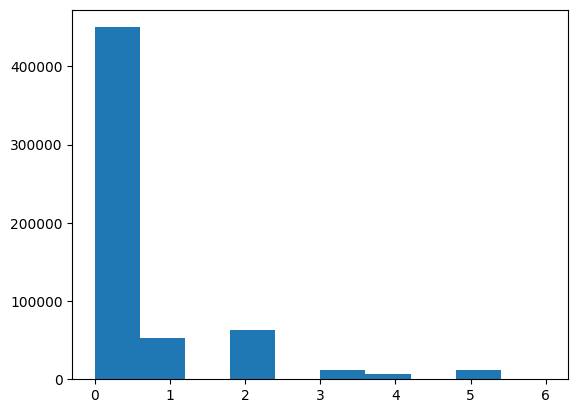

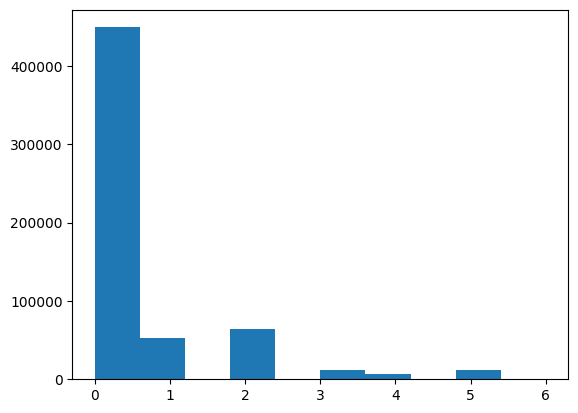

In [38]:
plt.hist(true_labels)
plt.show()
plt.hist(true_predictions)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, true_predictions)


In [40]:
conf_matrix

array([[448644,    486,    850,     49,     29,     32,      1],
       [   286,  52590,     10,      3,      0,      0,      0],
       [   406,      7,  63099,      1,      0,      0,      0],
       [    24,      1,      9,  11808,      0,      0,      0],
       [     3,      0,      0,      0,   6178,      0,      0],
       [    13,      0,      0,      2,      0,  12404,      0],
       [     0,      0,      0,      0,      0,      0,     76]])

In [14]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=list(config.label2idx.keys()), columns=list(config.label2idx.keys()))

In [15]:
display(conf_matrix_df.style.background_gradient(cmap='coolwarm'))

,O,B-INGREDIENT,I-INGREDIENT,B-UNIT,I-UNIT,B-QUANTITY,I-QUANTITY
O,449388,222,410,36,11,24,0
B-INGREDIENT,268,52616,4,1,0,0,0
I-INGREDIENT,322,5,63186,0,0,0,0
B-UNIT,6,1,5,11830,0,0,0
I-UNIT,2,0,0,0,6179,0,0
B-QUANTITY,1,0,0,0,0,12418,0
I-QUANTITY,0,0,0,0,0,0,76


In [16]:
samples = results[:10]

In [17]:
ingredient_map = json.load(open(data_path + 'ingredient_map.json'))

In [18]:
idx2ingredient = {value: key for key, value in ingredient_map.items()}

In [19]:
for i,d in samples.iterrows():
    for i, l, p in zip(d['input_ids'],d['ner_labels'], d['token_predictions']):
        if i != 0:
            tup = (tokenizer.decode(i), l, p)
            print(tup)
        
    #cp = [idx2ingredient[i] for i, c in enumerate(d['classification_predictions']) if c >=0.5]
    #print('Prediction', cp)
    #cl = [idx2ingredient[i] for i, c in enumerate(d['classification_labels']) if c == 1]
    #print('Lables', cl)

('[CLS]', -100, 0)
('1', 5, 5)
('Liter', 3, 3)
('Milch', 1, 1)
(',', 0, 0)
('50', 5, 5)
('g', 3, 3)
('Butter', 1, 1)
(',', 0, 0)
('1', 0, 0)
('Pri', 0, 0)
('##se', 0, 0)
('(', 0, 0)
('n', 0, 0)
(')', 0, 0)
('Salz', 1, 1)
(',', 0, 0)
('4', 5, 5)
('E', 3, 3)
('##L', 4, 4)
('Zucker', 1, 1)
(',', 0, 0)
('1', 5, 5)
('P', 3, 3)
('##ck', 4, 4)
('.', 0, 0)
('Van', 1, 1)
('##ille', 2, 2)
('##zu', 2, 2)
('##cker', 2, 2)
(',', 0, 0)
('125', 5, 5)
('g', 3, 3)
('Grie', 1, 1)
('##ß', 2, 2)
(',', 0, 0)
('1', 0, 0)
('kg', 0, 0)
('Ä', 1, 1)
('##pfel', 2, 2)
(',', 0, 0)
('200', 5, 5)
('m', 3, 3)
('##l', 4, 4)
('Wein', 1, 1)
(',', 0, 0)
('weiß', 0, 0)
(',', 0, 0)
('1', 0, 0)
('Zit', 1, 1)
('##rone', 2, 2)
('(', 0, 0)
('n', 0, 0)
(')', 0, 0)
(',', 0, 0)
('50', 5, 5)
('g', 3, 3)
('Sultan', 0, 0)
('##inen', 0, 0)
(',', 0, 0)
('4', 5, 5)
('E', 3, 3)
('##L', 4, 4)
('Zucker', 1, 1)
('und', 0, 0)
('Z', 1, 1)
('##im', 2, 2)
('##t', 2, 2)
(',', 0, 0)
('4', 5, 5)
('E', 3, 3)
('##L', 4, 4)
('Sah', 1, 1)
('##ne', 2,

In [20]:
keys = list(ingredient_map.keys())

In [21]:
keys

['Aal',
 'Aal blau',
 'Aal grün',
 'Aalbricke',
 'Aalsuppe',
 'Abalone',
 'Abatis',
 'Absacker',
 'Absinth',
 'Acajounuss',
 'Acerola',
 'Agavendicksaft',
 'Agrasel',
 'Ahornsirup',
 'Aioli',
 'Ajuco',
 'Ajvar',
 'Alcopops',
 'Ale',
 'Alkoholika',
 'Alkopops',
 'Allasch',
 'Almdudler',
 'Alpbutter',
 'Alpkäse',
 'Alsterwasser',
 'Alt',
 'Altbier',
 'Amaranth',
 'Amaretto',
 'Ambrosia',
 'Amuse-Bouche',
 'Amuse-Gueule',
 'Ananas',
 'Ananasjuice',
 'Ananassaft',
 'Anchovis',
 'Anglerfisch',
 'Angustora',
 'Anis',
 'Anisbogen',
 'Anisbrot',
 'Anisbrötchen',
 'Anisette',
 'Anisplätzchen',
 'Anisschnaps',
 'Anona',
 'Anschovis',
 'Antipasto',
 'Aperitif',
 'Apfel',
 'Apfelbeere',
 'Apfelessig',
 'Apfelfleckerln',
 'Apfelfülle',
 'Apfelgelee',
 'Apfelkiachl',
 'Apfelkoch',
 'Apfelkompott',
 'Apfelkraut',
 'Apfelkren',
 'Apfelkuchen',
 'Apfelkücherl',
 'Apfelmeerrettich',
 'Apfelmost',
 'Apfelmus',
 'Apfelsaft',
 'Apfelsaftschorle',
 'Apfelschlangerl',
 'Apfelschnitte',
 'Apfelschorle',
 'Apf

In [22]:
tokenizer.decode(samples['input_ids'].iloc[0])

'[CLS] 1 Liter Milch, 50 g Butter, 1 Prise ( n ) Salz, 4 EL Zucker, 1 Pck. Vanillezucker, 125 g Grieß, 1 kg Äpfel, 200 ml Wein, weiß, 1 Zitrone ( n ), 50 g Sultaninen, 4 EL Zucker und Zimt, 4 EL Sahne, 4 Eigelb, 4 Eiweiß, Butter für die Form Aus Milch, Salz, Butter, Zucker, Vanillezucker und Grieß einen Grießbrei kochen. Äpfel schälen und in dünne Spalten schneiden. Darüber Weißwein und Zitronensaft gießen. Die Sultaninen zu den Äpfeln geben. Grießbrei mit Sahne, Eigelb, Eischnee und Äpfel mischen. Die Masse in eine gebutterte Form füllen und bei 180 Grad etwa 40 Minuten im Ofen backen. Den fertigen Auflauf mit Zimt und Zucker bestreuen. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [23]:
keys = [config.nlp(k)[0].lemma_ for k in keys]

#[num for sublist in nested_list for num in sublist]

In [24]:
len(keys)

3159

In [25]:
len(np.unique(keys))

3094

In [26]:
keys = list(np.unique(keys))

In [27]:
keys

['Aal',
 'Aalbricke',
 'Aalsuppe',
 'Abalone',
 'Abati',
 'Absacker',
 'Absinth',
 'Acajounuss',
 'Acerola',
 'Agavendicksaft',
 'Agrasel',
 'Ahornsirup',
 'Aioli',
 'Ajuco',
 'Ajvar',
 'Alcopops',
 'Ale',
 'Alkoholika',
 'Alkopops',
 'Almdudler',
 'Alpbutter',
 'Alpkäse',
 'Alsterwasser',
 'Altbier',
 'Amaranth',
 'Amaretto',
 'Ambrosia',
 'Amuse-Bouch',
 'Amuse-Gueule',
 'Anana',
 'Ananasjuice',
 'Ananassaft',
 'Anchovis',
 'Angustora',
 'Anis',
 'Anisbog',
 'Anisbrot',
 'Anisbrötchen',
 'Anisette',
 'Anisschnaps',
 'Anona',
 'Anschovis',
 'Antipasto',
 'Aperitif',
 'Apfel',
 'Apfelbeer',
 'Apfelessig',
 'Apfelfleckerln',
 'Apfelfülle',
 'Apfelgelee',
 'Apfelkiachl',
 'Apfelkoch',
 'Apfelkompott',
 'Apfelkr',
 'Apfelkraut',
 'Apfelkuchen',
 'Apfelkücherl',
 'Apfelmost',
 'Apfelmus',
 'Apfelsaft',
 'Apfelsaftschorle',
 'Apfelschlangerl',
 'Apfelschnitte',
 'Apfelschorle',
 'Apfelsine',
 'Apfelsinensaft',
 'Apfelspalte',
 'Apfelspatz',
 'Apfelstrudel',
 'Apfelwein',
 'Appenzeller',
 'A

In [28]:
len(np.unique(keys))

3094

In [29]:
keys = list(np.unique(keys))

In [30]:
keys

['Aal',
 'Aalbricke',
 'Aalsuppe',
 'Abalone',
 'Abati',
 'Absacker',
 'Absinth',
 'Acajounuss',
 'Acerola',
 'Agavendicksaft',
 'Agrasel',
 'Ahornsirup',
 'Aioli',
 'Ajuco',
 'Ajvar',
 'Alcopops',
 'Ale',
 'Alkoholika',
 'Alkopops',
 'Almdudler',
 'Alpbutter',
 'Alpkäse',
 'Alsterwasser',
 'Altbier',
 'Amaranth',
 'Amaretto',
 'Ambrosia',
 'Amuse-Bouch',
 'Amuse-Gueule',
 'Anana',
 'Ananasjuice',
 'Ananassaft',
 'Anchovis',
 'Angustora',
 'Anis',
 'Anisbog',
 'Anisbrot',
 'Anisbrötchen',
 'Anisette',
 'Anisschnaps',
 'Anona',
 'Anschovis',
 'Antipasto',
 'Aperitif',
 'Apfel',
 'Apfelbeer',
 'Apfelessig',
 'Apfelfleckerln',
 'Apfelfülle',
 'Apfelgelee',
 'Apfelkiachl',
 'Apfelkoch',
 'Apfelkompott',
 'Apfelkr',
 'Apfelkraut',
 'Apfelkuchen',
 'Apfelkücherl',
 'Apfelmost',
 'Apfelmus',
 'Apfelsaft',
 'Apfelsaftschorle',
 'Apfelschlangerl',
 'Apfelschnitte',
 'Apfelschorle',
 'Apfelsine',
 'Apfelsinensaft',
 'Apfelspalte',
 'Apfelspatz',
 'Apfelstrudel',
 'Apfelwein',
 'Appenzeller',
 'A